In [27]:
import dataframePreparation as u
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from matplotlib.ticker import FormatStrFormatter
import numpy as np


## import data

In [28]:
yellow_results_df = u.preprocess_data("m6nq-qud6")


## correlation analysis

C:\Users\aymen\AppData\Local\Temp\ipykernel_25232\1728028048.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot:>

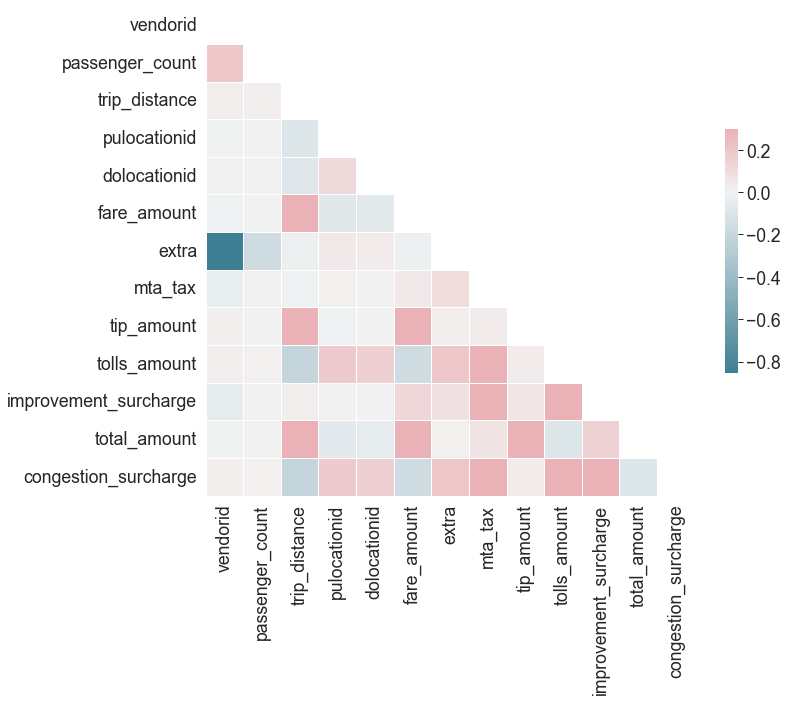

In [29]:
sns.set_style('white')
sns.set_context("paper",font_scale=2)
corr = yellow_results_df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.3, center=0,
           square=True, linewidths=0.5, cbar_kws={"shrink":0.5})


## temporal analysis

### augmenting data

days determination

In [30]:
yellow_results_df['PUday']=yellow_results_df['tpep_pickup_datetime'].dt.day_name()
yellow_results_df['DOday']=yellow_results_df['tpep_dropoff_datetime'].dt.day_name()


period determination

The time part is represented by hours,minutes and seconds which is difficult for the analysis 
thus we divide the times into 4 time zones: 

* morning (4 hrs to 10 hrs)
* midday (10 hrs to 16 hrs) 
* evening (16 hrs to 22 hrs) 
* late night (22 hrs to 4 hrs)



In [31]:

def timezone(x):
    if x>=dt.time(4, 0, 1) and x <=dt.time(10, 0, 0):
        return 'morning'
    elif x>=dt.time(10, 0, 1) and x <=dt.time(16, 0, 0):
        return 'midday'
    elif x>=dt.time(16, 0, 1) and x <=dt.time(22, 0, 0):
        return 'evening'
    elif x>=dt.time(22, 0, 1) or x <=dt.time(4, 0, 0):
        return 'late night'

yellow_results_df['PUperiod']=yellow_results_df['tpep_pickup_datetime'].apply(lambda x :timezone(dt.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )
yellow_results_df['DOperiod']=yellow_results_df['tpep_dropoff_datetime'].apply(lambda x :timezone(dt.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )


hours determination

In [32]:
yellow_results_df['PUhour']=yellow_results_df['tpep_pickup_datetime'].dt.hour
yellow_results_df['DOhour']=yellow_results_df['tpep_dropoff_datetime'].dt.hour


duration calculation in seconds

In [33]:
difference =(yellow_results_df.tpep_dropoff_datetime-yellow_results_df.tpep_pickup_datetime)
difference_seconds=difference.dt.total_seconds()
yellow_results_df['durationSeconds']= difference_seconds


duration calculations in intervals

In [76]:
bins=np.array([0,300,1200,3600000])
yellow_results_df['durationIntervals']=pd.cut(yellow_results_df.durationSeconds,bins,labels=["<5", "5-20",">20"])
yellow_results_df

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,...,total_amount,congestion_surcharge,PUday,DOday,PUperiod,DOperiod,PUhour,DOhour,durationSeconds,durationIntervals
0,1,2021-01-01 00:30:10,2021-01-01 00:36:12,1,2.10,1,N,142,43,2,...,11.80,2.5,Friday,Friday,late night,late night,0,0,362.0,5-20
1,1,2021-01-01 00:51:20,2021-01-01 00:52:19,1,0.20,1,N,238,151,2,...,4.30,0.0,Friday,Friday,late night,late night,0,0,59.0,<5
2,1,2021-01-01 00:43:30,2021-01-01 01:11:06,1,14.70,1,N,132,165,1,...,51.95,0.0,Friday,Friday,late night,late night,0,1,1656.0,>20
3,1,2021-01-01 00:15:48,2021-01-01 00:31:01,0,10.60,1,N,138,132,1,...,36.35,0.0,Friday,Friday,late night,late night,0,0,913.0,5-20
4,2,2021-01-01 00:31:49,2021-01-01 00:48:21,1,4.94,1,N,68,33,1,...,24.36,2.5,Friday,Friday,late night,late night,0,0,992.0,5-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,1,2021-01-25 17:56:51,2021-01-25 18:08:03,1,2.00,1,N,163,239,1,...,15.30,2.5,Monday,Monday,evening,evening,17,18,672.0,5-20
999996,1,2021-01-25 17:04:55,2021-01-25 17:14:08,1,0.90,1,N,161,186,1,...,14.80,2.5,Monday,Monday,evening,evening,17,17,553.0,5-20
999997,2,2021-01-25 17:27:41,2021-01-25 17:34:51,2,1.75,1,N,162,236,1,...,14.16,2.5,Monday,Monday,evening,evening,17,17,430.0,5-20
999998,2,2021-01-25 17:48:51,2021-01-25 18:01:25,2,1.92,1,N,140,43,1,...,17.16,2.5,Monday,Monday,evening,evening,17,18,754.0,5-20


## temporal based analysis

#### days count

In [35]:
yellow_results_df['PUday'].value_counts()


Friday       168621
Monday       153016
Saturday     146171
Thursday     145051
Wednesday    138784
Tuesday      136467
Sunday       111890
Name: PUday, dtype: int64

In [36]:
yellow_results_df['DOday'].value_counts()

Friday       168374
Monday       153213
Saturday     146185
Thursday     144926
Wednesday    138801
Tuesday      136479
Sunday       112022
Name: DOday, dtype: int64

#### periodical analysis

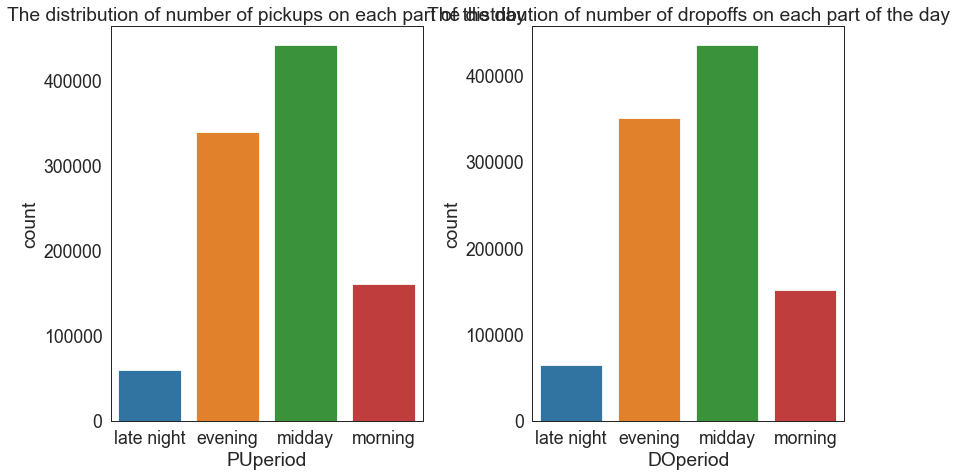

In [37]:
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(12,7))
sns.countplot(x='PUperiod',data=yellow_results_df,ax=ax[0])
ax[0].set_title('The distribution of number of pickups on each part of the day')

sns.countplot(x='DOperiod',data=yellow_results_df,ax=ax[1])
ax[1].set_title('The distribution of number of dropoffs on each part of the day')
plt.tight_layout()


#### hourly analysis

Text(0.5, 1.0, 'Distribution of dropoff hours')

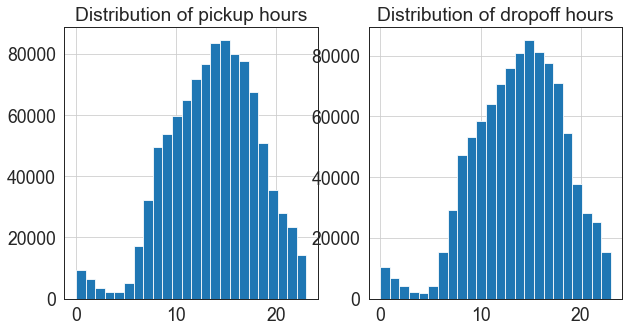

In [38]:
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
yellow_results_df.PUhour.hist(bins=24,ax=ax[0])
ax[0].set_title('Distribution of pickup hours')
yellow_results_df.DOhour.hist(bins=24,ax=ax[1])
ax[1].set_title('Distribution of dropoff hours')


## duration analysis

C:\Users\aymen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'The distribution of of the Pick Up  Duration distribution')

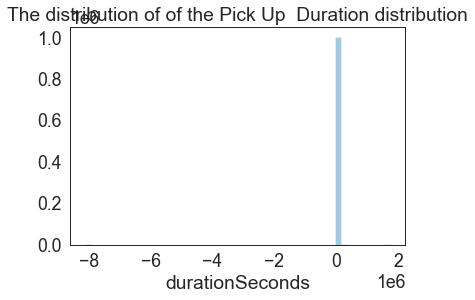

In [42]:
sns.distplot(yellow_results_df['durationSeconds'],kde=False)
plt.title('The distribution of of the Pick Up  Duration distribution')


duration intervals analysis

Text(0.5, 1.0, 'Relationship between trip duration intervals and Pickup day')

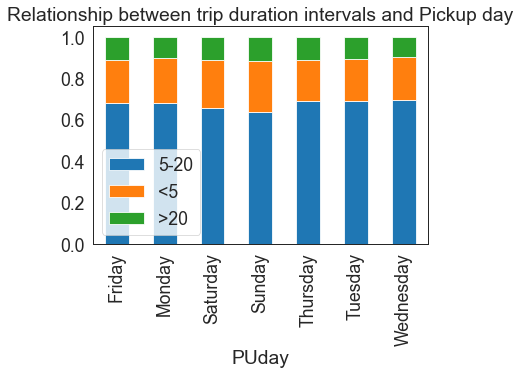

In [77]:
ax0=yellow_results_df.groupby('PUday')['durationIntervals'].value_counts(normalize=True).unstack()
ax0.plot(kind='bar', stacked='True')
plt.title('Relationship between trip duration intervals and Pickup day')


Text(0.5, 1.0, 'Relationship between trip duration intervals and drop-off day')

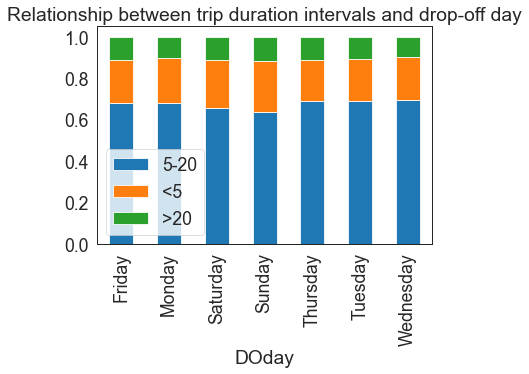

In [78]:
ax1=yellow_results_df.groupby('DOday')['durationIntervals'].value_counts(normalize=True).unstack()
ax1.plot(kind='bar', stacked='True')
plt.title('Relationship between trip duration intervals and drop-off day')


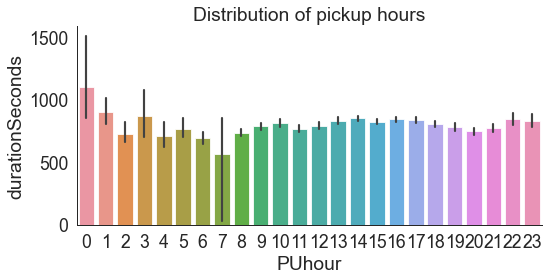

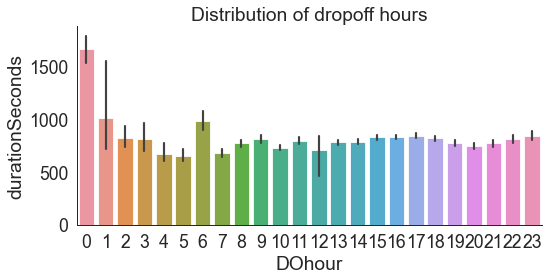

In [68]:

sns.catplot(x="PUhour", y="durationSeconds",kind="bar",data=yellow_results_df,height=4,aspect=2)
plt.title('Distribution of pickup hours')
ax=sns.catplot(x="DOhour", y="durationSeconds",kind="bar",data=yellow_results_df,height=4,aspect=2)
plt.title('Distribution of dropoff hours')

plt.show()


The graphs denote the average estimate of a trip for each day of the week. The error bars provides some indication of the uncertainty around that estimate

=> The highest average time taken to complete a trip are for trips started in late evening(starting from 22h) and the least are the ones taken in the early morning(between 7-12 hours)

